In [3]:
from myutils import Datasets as ds
from myutils import Helpers as h
import numpy as np
from matplotlib import pyplot as plt

#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

Concat=True, combines the training and test dataset.

Here to have more data to evalutate the complexity measures (no split is needed in this step, so why not use all of the data)

In [4]:
data = ds.get_all_data(concat=True)

ALL_NUMBERS
SIX_AND_NINES
ONLY_SIXES
RANDOM
SAMEPICTURE


In [5]:
for dataset in data:
    data[dataset]["x_pca"] = h.PCA(data[dataset]["x"],n_components=4, reshape=False)

/Users/felixbieswanger/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


Folgende Formel aus Paper nach implementiert:  
![](images/Fischer_F1_formula.png)

In [7]:
for dataset in data:
    x = data[dataset]["x_pca"]
    y = data[dataset]["y"]
    
    unique_y = np.unique(y)
    
    classes = {}
    for label in unique_y:
        classes[label] = x[y == label]
    
    fdr = np.zeros(4)
    for fi in range(4):
    
        zähler = list()
        for j in unique_y:
            for k in unique_y:
                if j != k:
                    p_cj = len(classes[j]) / len(x)
                    p_ck = len(classes[k]) / len(x)
    
                    u_cj = np.mean(classes[j][:,fi], axis=0)
                    u_ck = np.mean(classes[k][:,fi], axis=0)
    
                    zähler.append(p_cj*p_ck*(np.power((u_cj-u_ck),2)))
    
    
        nenner = list()
        for j in unique_y:
            p_cj = len(classes[j]) / len(x)
            sigma_cj = np.std(classes[j][:,fi], axis=0)
            nenner.append(p_cj*(np.power(sigma_cj,2)))
    
        if np.sum(nenner) == 0.0:
            fdr[fi] = 0
        else:
            fdr[fi] = np.sum(zähler)/np.sum(nenner)
    print(dataset)
    print(fdr)
    print()
    data[dataset]["fdr"] = fdr

ALL_NUMBERS
[2.8117379  3.80089325 0.47742212 1.44195316]

SIX_AND_NINES
[8.54885884 0.06026788 0.02749843 0.01467175]

ONLY_SIXES
[0. 0. 0. 0.]

RANDOM
[0.00034143 0.00021226 0.00021441 0.00036705]

SAMEPICTURE
[0. 0. 0. 0.]



Eine Interessante Beobachtung ist, dass im Dataset Six and Nines der linke obere Pixel einen hohen Wert bekommt. Das ist ganeu der Pixel der in der manuellen Klassifikation als Unterscheidungsmerkmal benutzt wird.

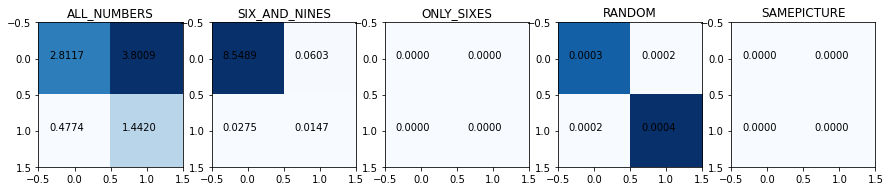

In [8]:
i=0
# plot fdr in grid
fig, ax = plt.subplots(1,5,figsize=(15,10))
for dataset in data:
    ax[i].imshow(np.round(data[dataset]["fdr"],5).reshape(2,2),cmap="Blues")
    for j in range(2):
        for k in range(2):
            ax[i].annotate("{:.4f}".format(data[dataset]["fdr"][j*2+k]),xy=(k-0.35,j))
    ax[i].set_title(dataset)
    i+=1

![](images/MaxFischer.png)

In [9]:
for dataset in data:
    print(dataset, 1 / (1 + np.amax(data[dataset]["fdr"])))


ALL_NUMBERS 0.20829457097624463
SIX_AND_NINES 0.10472455574938327
ONLY_SIXES 1.0
RANDOM 0.9996330840697036
SAMEPICTURE 1.0
